# Linear Regression Assignment

###### Submitted By

Mudassar Dildar Majgaonkar

### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They want to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1) Which variables are significant in predicting the price of a car

2) How well those variables describe the price of a car


### Main Objective

This assigment requires us to build model for predicting the price of cars with the available independent variables. 
Also in the process we will need to identify the variables which are driving factors for deciding the price of the car.

It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. 

Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

# Step 1: Data Understanding

We will start understanding the basic data and doing the cleanup operations if required

In [1]:
#Import the necessary python libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Import necessary libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Read the data into variable car_data
car_data = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
#Check the data
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#Check car info for null values
car_data.info()
car_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**Surprisingly no null data.**

In [5]:
#Check for the values desccription
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
#As given in the problem description consider Car Manufacture Name for Analysis
#Extract the Car Manufacture name
car_data['CarCompany'] = car_data['CarName'].str.split(" ",expand=True)[0]
car_data['CarCompany'].unique()
car_data.head(5)

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


From the above o/p there seems to be some miss spelled company names.

e.g:'mazda' is misspelled to 'maxda', 'toyota' to 'toyouta', 'Nissan' and 'nissan' are considered 2 different companies, 'vokswagen', 'volkswagen', 'vw' should be mapped to single name 'volkswagen' and so on. So lets tackle these first.

In [7]:
#Map the misspelled names to correct names
car_data['CarCompany'] = car_data['CarCompany'].replace('maxda','mazda')
car_data['CarCompany'] = car_data['CarCompany'].replace('toyouta','toyota')
car_data['CarCompany'] = car_data['CarCompany'].replace('Nissan','nissan')
car_data['CarCompany'] = car_data['CarCompany'].replace('vokswagen','volkswagen')
car_data['CarCompany'] = car_data['CarCompany'].replace('vw','volkswagen')
car_data['CarCompany'] = car_data['CarCompany'].replace('porcshce','porsche')

car_data['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [8]:
#We can drop the CarName column since its no more required for analysis
car_data = car_data.drop('CarName',axis=1)

#Also remove the car_ID column since it is also not required
car_ID = car_data.pop('car_ID')
car_data.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [9]:
#Drop the duplicates if any
car_data.shape
car_data = car_data.drop_duplicates()
car_data.shape

(205, 25)

(205, 25)

**No duplicates in the dataset**

In [10]:
#get the numeric data and categorical data
numeric_data = car_data.select_dtypes(include=np.number)
numeric_data.columns

categorical_data = car_data.select_dtypes(exclude=np.number)
categorical_data.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CarCompany'],
      dtype='object')

Interestingly there are no duplicates, no null values and the data looks in pretty good shape for initial analysis. So lets start with the data analysis.

We can convert the number name in cyclinder and doornumbers to actual numbers we can do this by defining a function to do that. The rest of the categorical variables can be converted by creating the dummy variables.

In [11]:
#Check the data in the categorical columns
#Just define a list col2 to append all the columns with 2 unique values to use later
col2 =[]
for i in categorical_data:
    if len(car_data[i].unique())==2:  #Append the values to col2
        col2.append(i)
    print('Unique values in ' + i + ' count: ' + str(len(car_data[i].unique())) + ' values: '+str((car_data[i].unique())))

Unique values in fueltype count: 2 values: ['gas' 'diesel']
Unique values in aspiration count: 2 values: ['std' 'turbo']
Unique values in doornumber count: 2 values: ['two' 'four']
Unique values in carbody count: 5 values: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Unique values in drivewheel count: 3 values: ['rwd' 'fwd' '4wd']
Unique values in enginelocation count: 2 values: ['front' 'rear']
Unique values in enginetype count: 7 values: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Unique values in cylindernumber count: 7 values: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Unique values in fuelsystem count: 8 values: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Unique values in CarCompany count: 22 values: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


# Step 2: Data Analysis

For modelling a linear regression model, we will first check if indeed there are any independent variables which are linearly related to the depended variable  - PRICE.

For this check the pairplot of the independent variable (numeric) against dependent variable - PRICE.

#### Data Visuaization / EDA Analysis

Text(0.5, 1.08, 'Plot 1 - Price v/s independent variables')

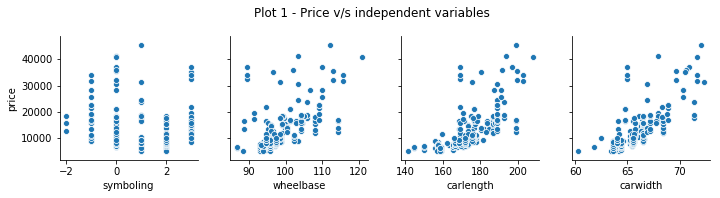

In [12]:
#Price v/s independent variables - 1
g = sns.pairplot(car_data, x_vars=['symboling', 'wheelbase', 'carlength', 'carwidth'],
            y_vars=['price'])
g.fig.suptitle("Plot 1 - Price v/s independent variables",y=1.08)

Text(0.5, 1.08, 'Plot 2 - Price v/s independent variables')

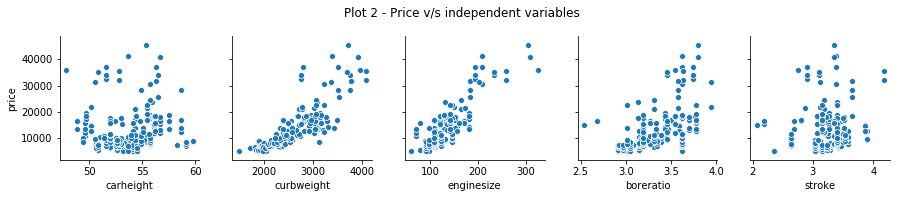

In [13]:
#Price v/s independent variables -2 
g= sns.pairplot(car_data , x_vars=['carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke'],
            y_vars=['price'])
g.fig.suptitle("Plot 2 - Price v/s independent variables",y=1.08)

Text(0.5, 1.08, 'Plot 3 - Price v/s independent variables')

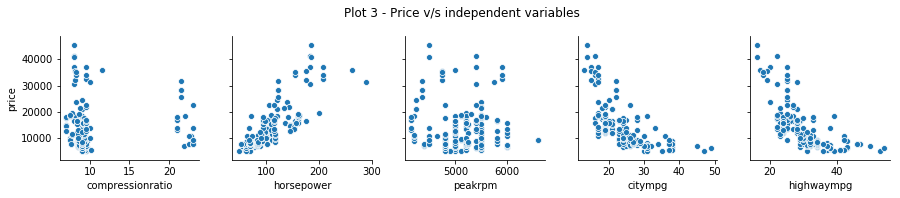

In [14]:
#Price v/s independent variables - 3
g = sns.pairplot(car_data , x_vars=['compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
            y_vars=['price'])
g.fig.suptitle("Plot 3 - Price v/s independent variables",y=1.08)

**Observations:**

From above plots Plot1, Plot2 and Plot3 we can observe that variables like carlength, carwidth, curbweight, enginesize, boreratio, horsepower have positive linear association with the price while variables citympg and highwaympg have negative linear association with the price. Since the data is linearly related as seen from above plots, we can infer the predictions using linear regression or we can use linear regression algorithm for modelling.


There are few outlier values also observed in these plots which we will take care later.

Now lets check the categorical data.

In [15]:
#Define function plotCategory that plots box and count plots of the variables defined
#It takes 2 variables col1 and col2. col2 is optional.
#The function plots graphs for the variables passed.
def plotCategory(df,col1,col2=False):
    plt.figure(figsize=(20,10))
    plt.subplot(2,2,1)
    sns.boxplot(x=col1,y='price',data=df).set_title(col1 + ' v/s price')
    plt.subplot(2,2,2)
    sns.countplot(x=col1, data=df).set_title('count of ' + col1)
    if col2:
        plt.subplot(2,2,3)
        sns.boxplot(x=col2,y='price',data=df).set_title(col2 + ' v/s price')
        plt.subplot(2,2,4)
        sns.countplot(x=col2, data=df).set_title('count of ' + col2)

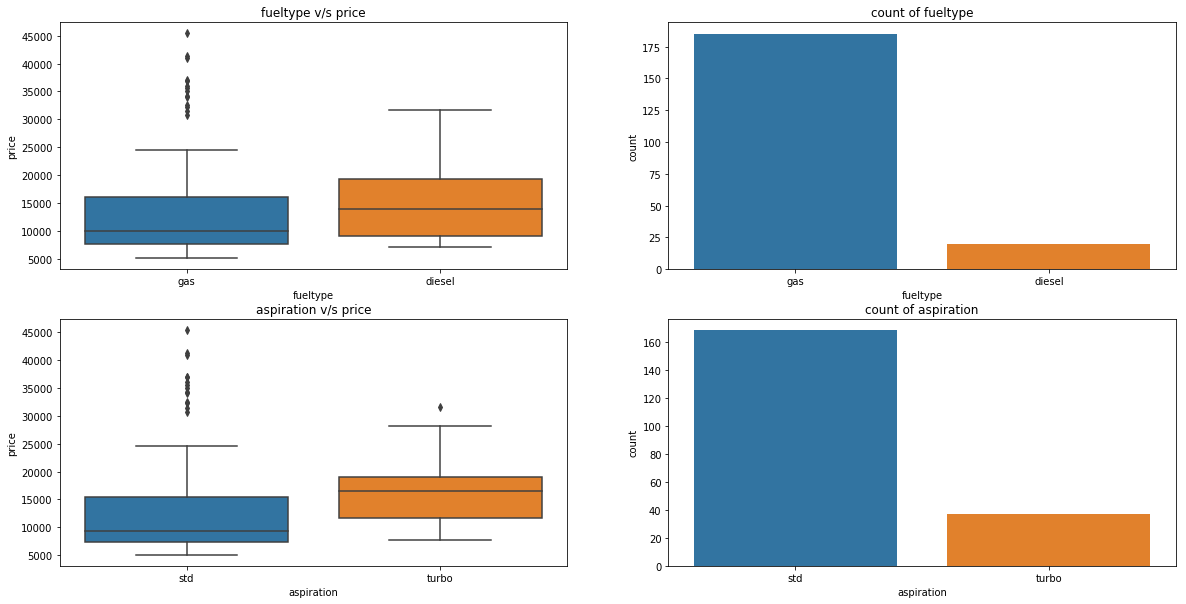

In [16]:
#Check fueltype and aspiration
plotCategory(car_data,'fueltype','aspiration')

**Observation:**

From the Plot above it seems that the vehicles with 'enginetype' diesel and 'aspiration' turbo are priced higher while the number of vehicles with fueltype - gas and aspiration std are higher.

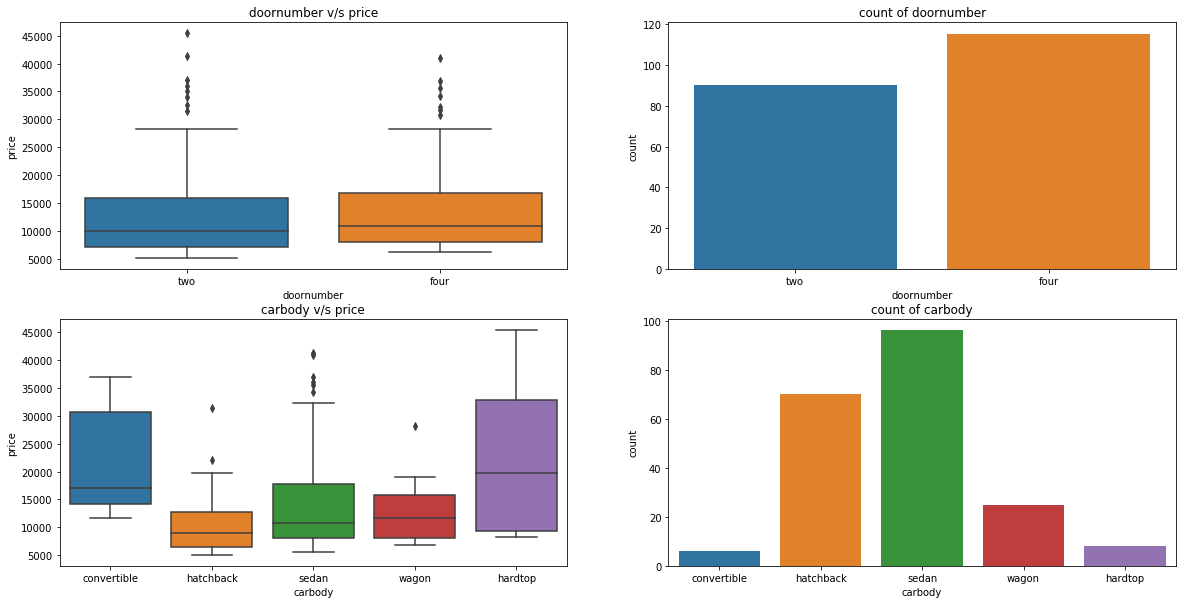

In [17]:
#Check doornumber and carbody
plotCategory(car_data,'doornumber','carbody')

**Observation:**

From the plot above there doesnt seem much difference in the price range for 'doornumber'. Although the vehicles with 4 doors are priced bit higher than the vehicles with 2 doors the difference doesnt seem much significant for now. The number of vehicles with door 4 are certainly higher though. 

Similarly it seems like the vehicles with 'carbody' convertible and hardtop are priced bit higher than the rest of the 'carbody' types with hatchback being the lowest priced 'carbody' segment. But the number of sedan and hatchback cars sold is definitely more.

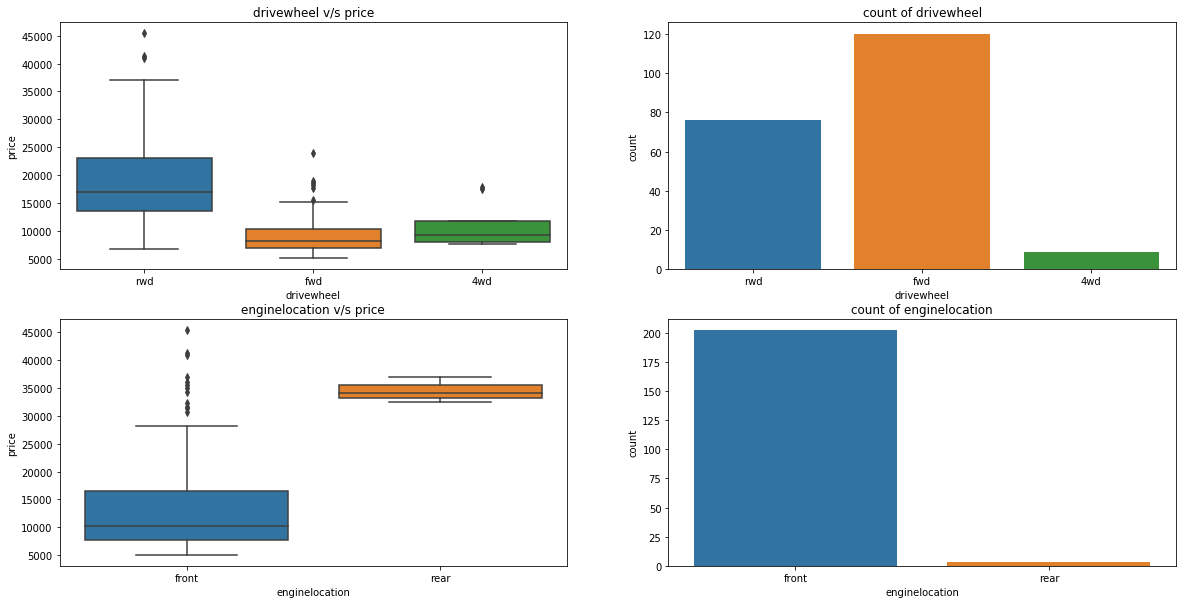

In [18]:
#Check drivewheel and enginelocation
plotCategory(car_data,'drivewheel','enginelocation')

**Observation:**

From plot above, it seems like drivewheel of type 'rwd' are priced way higher then the other drivewheel type. There doesnt seem to be significant difference in the price for the other 2 types. Although the number of cars with drivewheel fwd is definitely higher closely followed by drivewheel rwd.

The price variation for front mounted 'enginelocation' is more, the rear mounted 'enginelocation' are priced higher than the front mounted 'enginelocation'. The number of cars with front mounted enginelocation is more than that of rear mounted enginelocation.

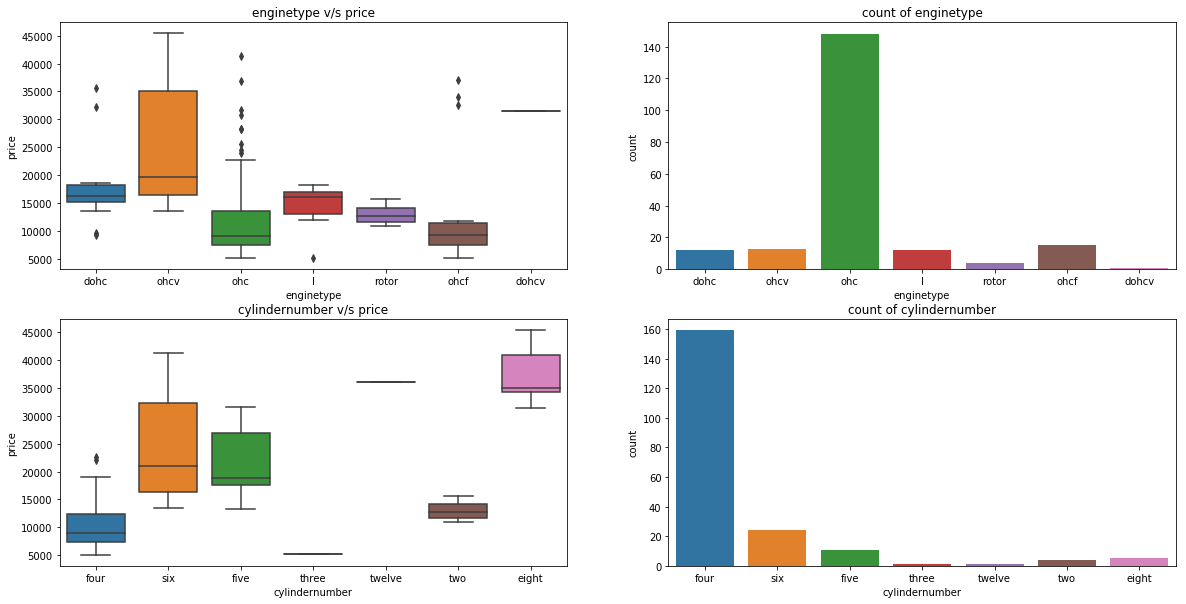

In [19]:
#Check enginetype and cylindernumber
plotCategory(car_data,'enginetype','cylindernumber')

**Observation:**

From plot above clearly, the enginetype 'ohcv' takes the cake whereby its priced way higher than the other types. Also the price variance for this enginetype is way more than other enginetypes. Also from the count plot it seems that engintype ohc has the highest count closely followed by dohc, dhcv and ohcf and l. enginetype rotor and dohcv seems insignificant for now since the count in extremly low and it wont have any significance in analysis. May be we can group them is type like other. This would also reduce the dimensionality of dataset and we will have less variables to work on.

Similarly, from the above plot it seems like the vehicles with eight cylinders are priced higher than the rest. Followed by twelve and six cylindernumber. Also it seems like the count for four, six and five is significant as compared to others which are very less. May be we can too group them is some category like less than four and greater than six so that vehicles with cylinders 2,3 will be clubbed into 1 category and 8 and 12 into another with some significant counts and less variables for analaysis.

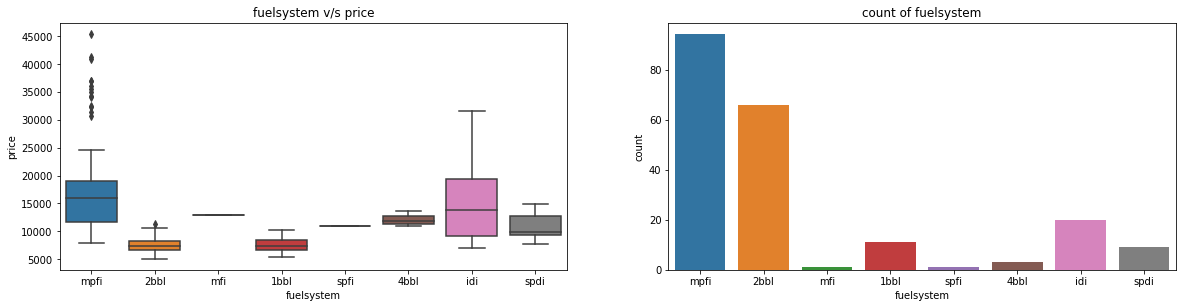

In [20]:
#Check fuelsystem
plotCategory(car_data,'fuelsystem')

**Observation:**

From plot above it seems like vehicles with fuelsystem: 'mpfi' and 'idi' are priced higher than the rest of the fuelsystem types while the number of mpfi, 2bbl, 1bbl, idi, spdi is significant while mfi, spfi and 4bbl is very less.

<Figure size 1800x576 with 0 Axes>

Text(0.5, 1.0, 'CarCompany v/s price')

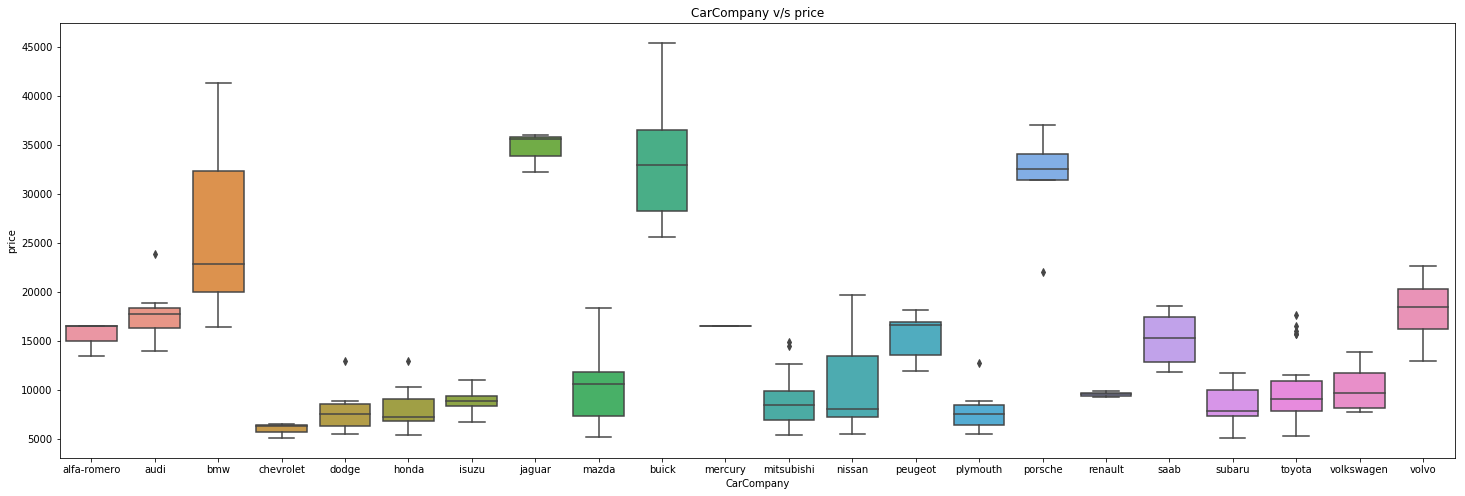

In [21]:
#Since the defined function uses subplots to plot the resultant plots were too congested
#So used individual functions for CarCompany
#Check boxplot CarCompany v/s price
plt.figure(figsize=(25,8))
sns.boxplot(x='CarCompany',y='price',data=car_data).set_title("CarCompany v/s price")

**Observation:**

From the plot above it seems like cars with brand BMW, BUICK, PORSCHE, JAGUAR are priced higher. There clearly seems 3 categories of car from above plot. High end cars with average price tag of 20K and above, Medium Budget Cars lying between 10K and 20K and low end cars below 10K. May be we can bin them in these categories later?

<Figure size 1800x576 with 0 Axes>

Text(0.5, 1.0, 'CarCompany count')

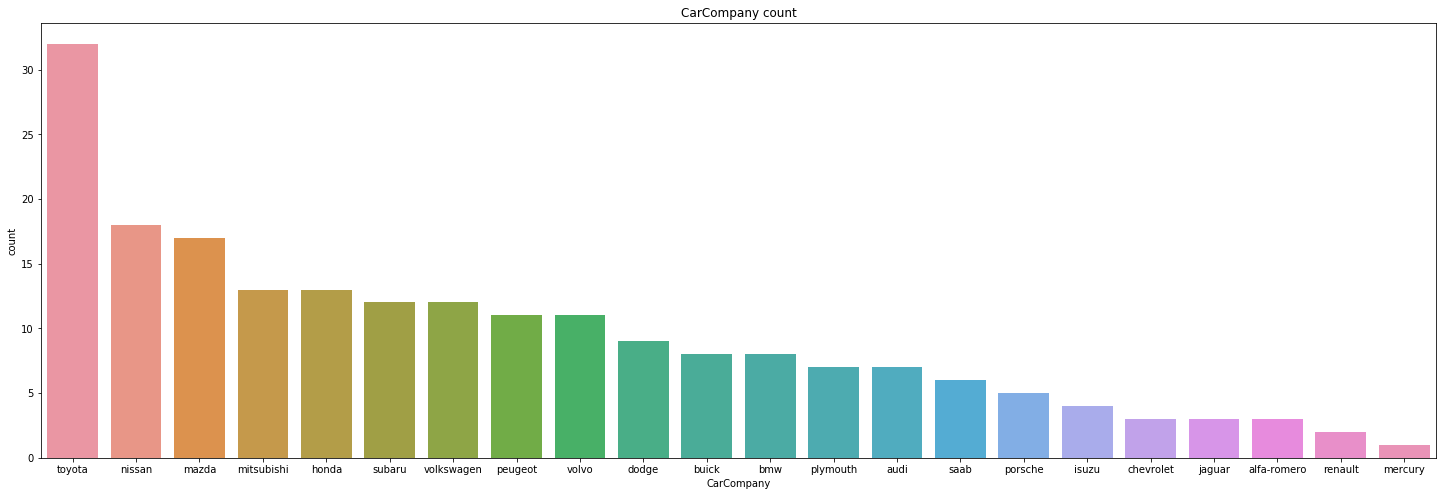

In [22]:
#Check count plot for CarCompany
plt.figure(figsize=(25,8))
sns.countplot(x='CarCompany',data=car_data,order = car_data['CarCompany'].value_counts().index).set_title("CarCompany count")

**Observation:**

From the above plot its clear that low end cars are more in counts as compared to that of high end cars as identified above.

Based on the analysis above lets derive some business relation variables.

## Derived Variables





**1) carBudget - Based on car prices**

As we have seen from above analysis the cars can clearly be divided based on their price range. So we will derive a metric carBudget in which we will divide the cars based on the price into Budget (upto 10K), Medium(10K - 20K) and High(>20K).

In [23]:
#Convert the column to integer for binning
car_data['price'] = car_data['price'].astype('int')

#Create temporary dataframe for calculations
car_temp = car_data.copy()

#group the names by price mean
car_table = car_temp.groupby(['CarCompany'])['price'].mean()

#Join the result
car_temp = car_temp.merge(car_table.reset_index(), how='left',on='CarCompany')

#Create bin results
cars_bin=['Budget','Medium','Highend']

In [24]:
#Create carBudget Bins with interval of 10000
car_data['carBudget'] = pd.cut(car_temp['price_y'],[x for x in range(0, 40000, 10000)], right=False,labels=cars_bin)


In [25]:
#Check the data
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,carBudget
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495,alfa-romero,Medium
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500,alfa-romero,Medium
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500,alfa-romero,Medium
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950,audi,Medium
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450,audi,Medium


<Figure size 1800x576 with 0 Axes>

Text(0.5, 1.0, 'CarCompany v/s price')

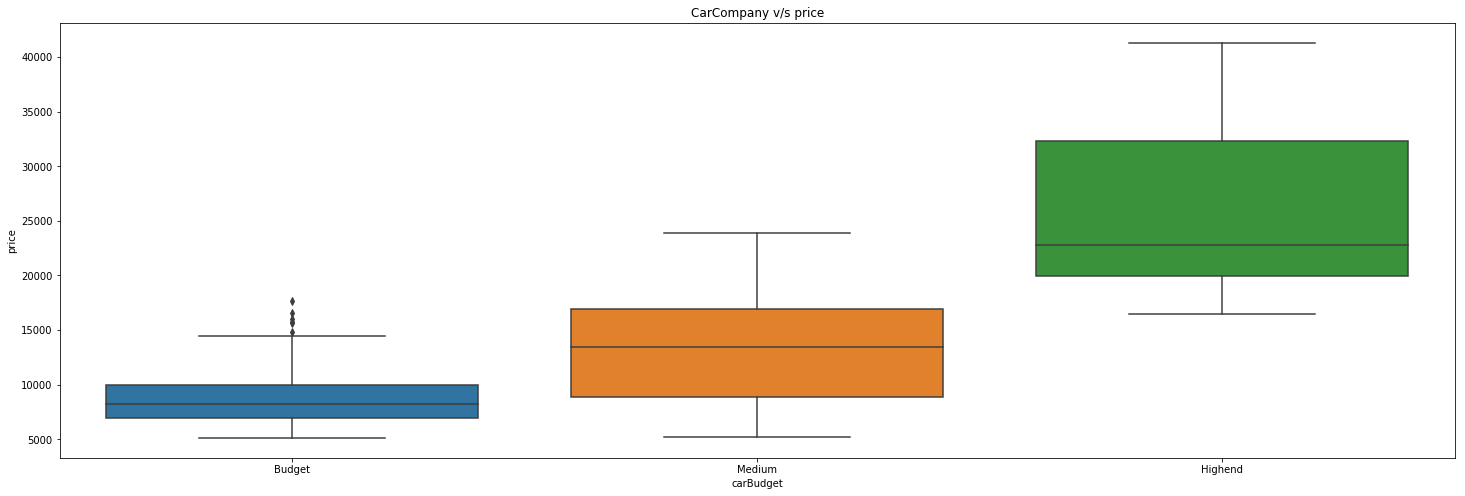

In [26]:
#Check the resultant new column carBudget
plt.figure(figsize=(25,8))
sns.boxplot(x='carBudget',y='price',data=car_data).set_title("CarCompany v/s price")

**Observation:**

As expected the high end vehicles are priced at higher range.

<Figure size 1800x576 with 0 Axes>

Text(0.5, 1.0, 'carRange count')

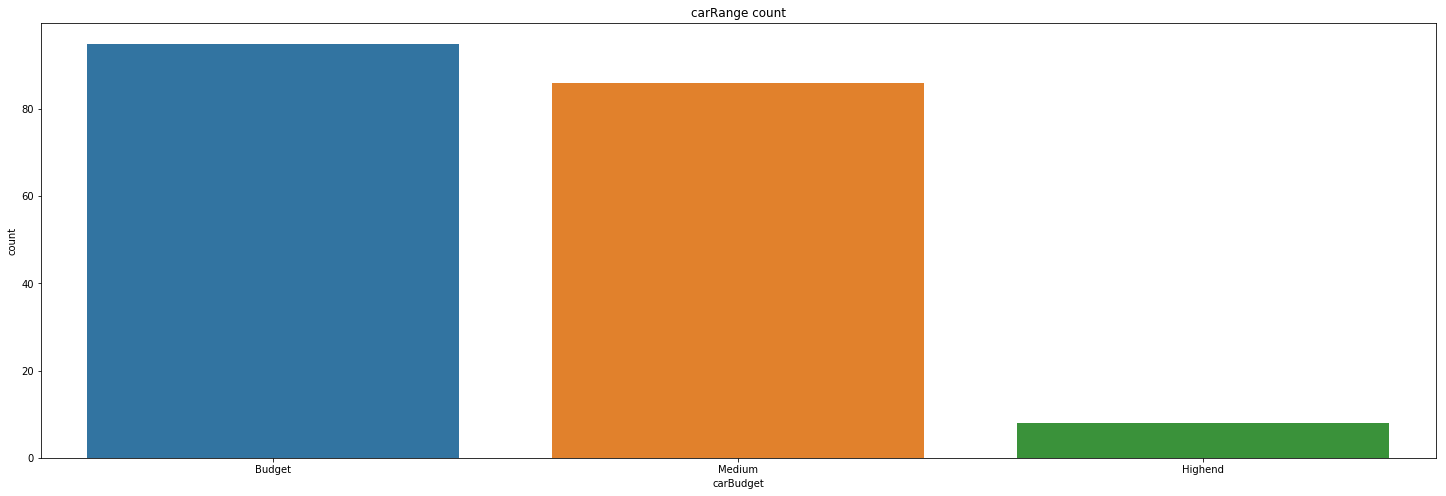

In [27]:
#Check the counts of vehicles in each bin
plt.figure(figsize=(25,8))
sns.countplot(x='carBudget',data=car_data).set_title("carRange count")

**Observation:**

From the above plot it seems that vehicles which fall in Budget Segment and Medium Segment are high in counts in the given dataset.


**2) powerRatio - Based on horsepower and total weight of vehicle**

We can derive a metric powerRatio which is basically horsepower divided by its curb weight. This gives us the power-to-weight ratio. This measure is what makes a small engine car powerful and a big-engine beast docile. 

***So its really important metric.***


The higher the number, the better your car is going to be in terms of performance.

In [28]:
#Derive the metric powerRatio
car_data['powerRatio'] = car_data['horsepower']/car_data['curbweight']

#Add this to the numeric_data for later use.
numeric_data = pd.concat([numeric_data,car_data['powerRatio']],axis=1)

Text(0.5, 1.0, 'powerRatio v/s price')

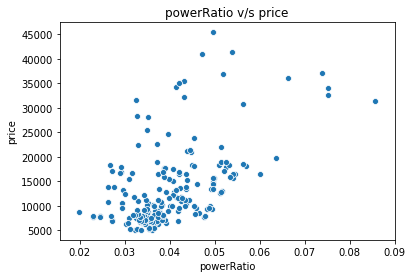

In [29]:
#Check the relevance through plots
sns.scatterplot(x='powerRatio', y='price',data=car_data).set_title('powerRatio v/s price')

**Observation:**

The drived metric powerRatio really seems important and it seems linealy dependent on the price. If we filter out few outliers we can really make use of this metric.

### Correlation between different variables

Now lets check the correlation between the different variables.

<Figure size 1440x576 with 0 Axes>

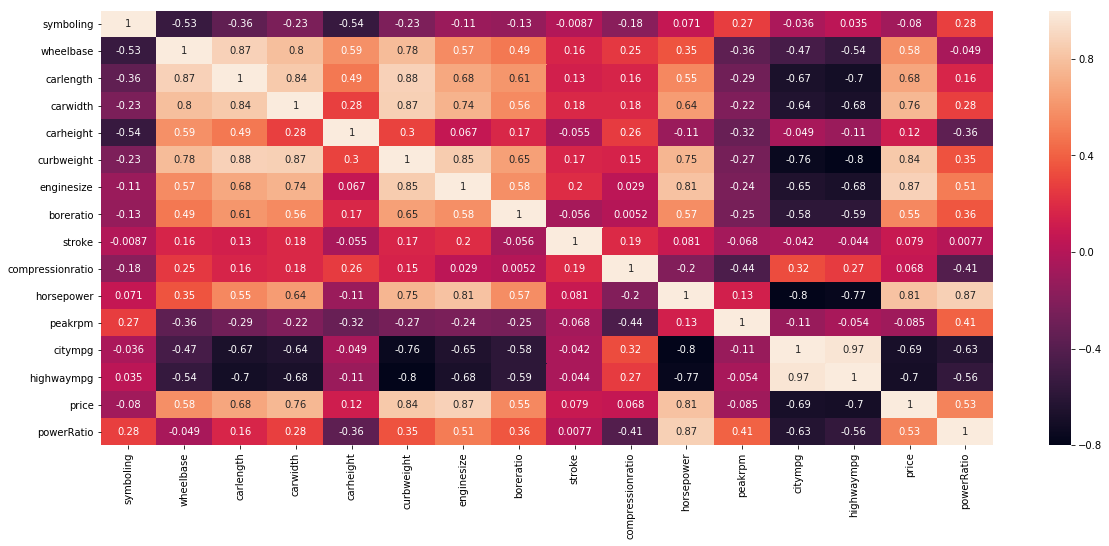

In [30]:
plt.figure(figsize=(20,8))
sns.heatmap(car_data.corr(),annot=True)

**Observation:**

From the above plot it seems like variables carlength, carwidth, wheelbase, curbweight are highly correlated (>0.85) 

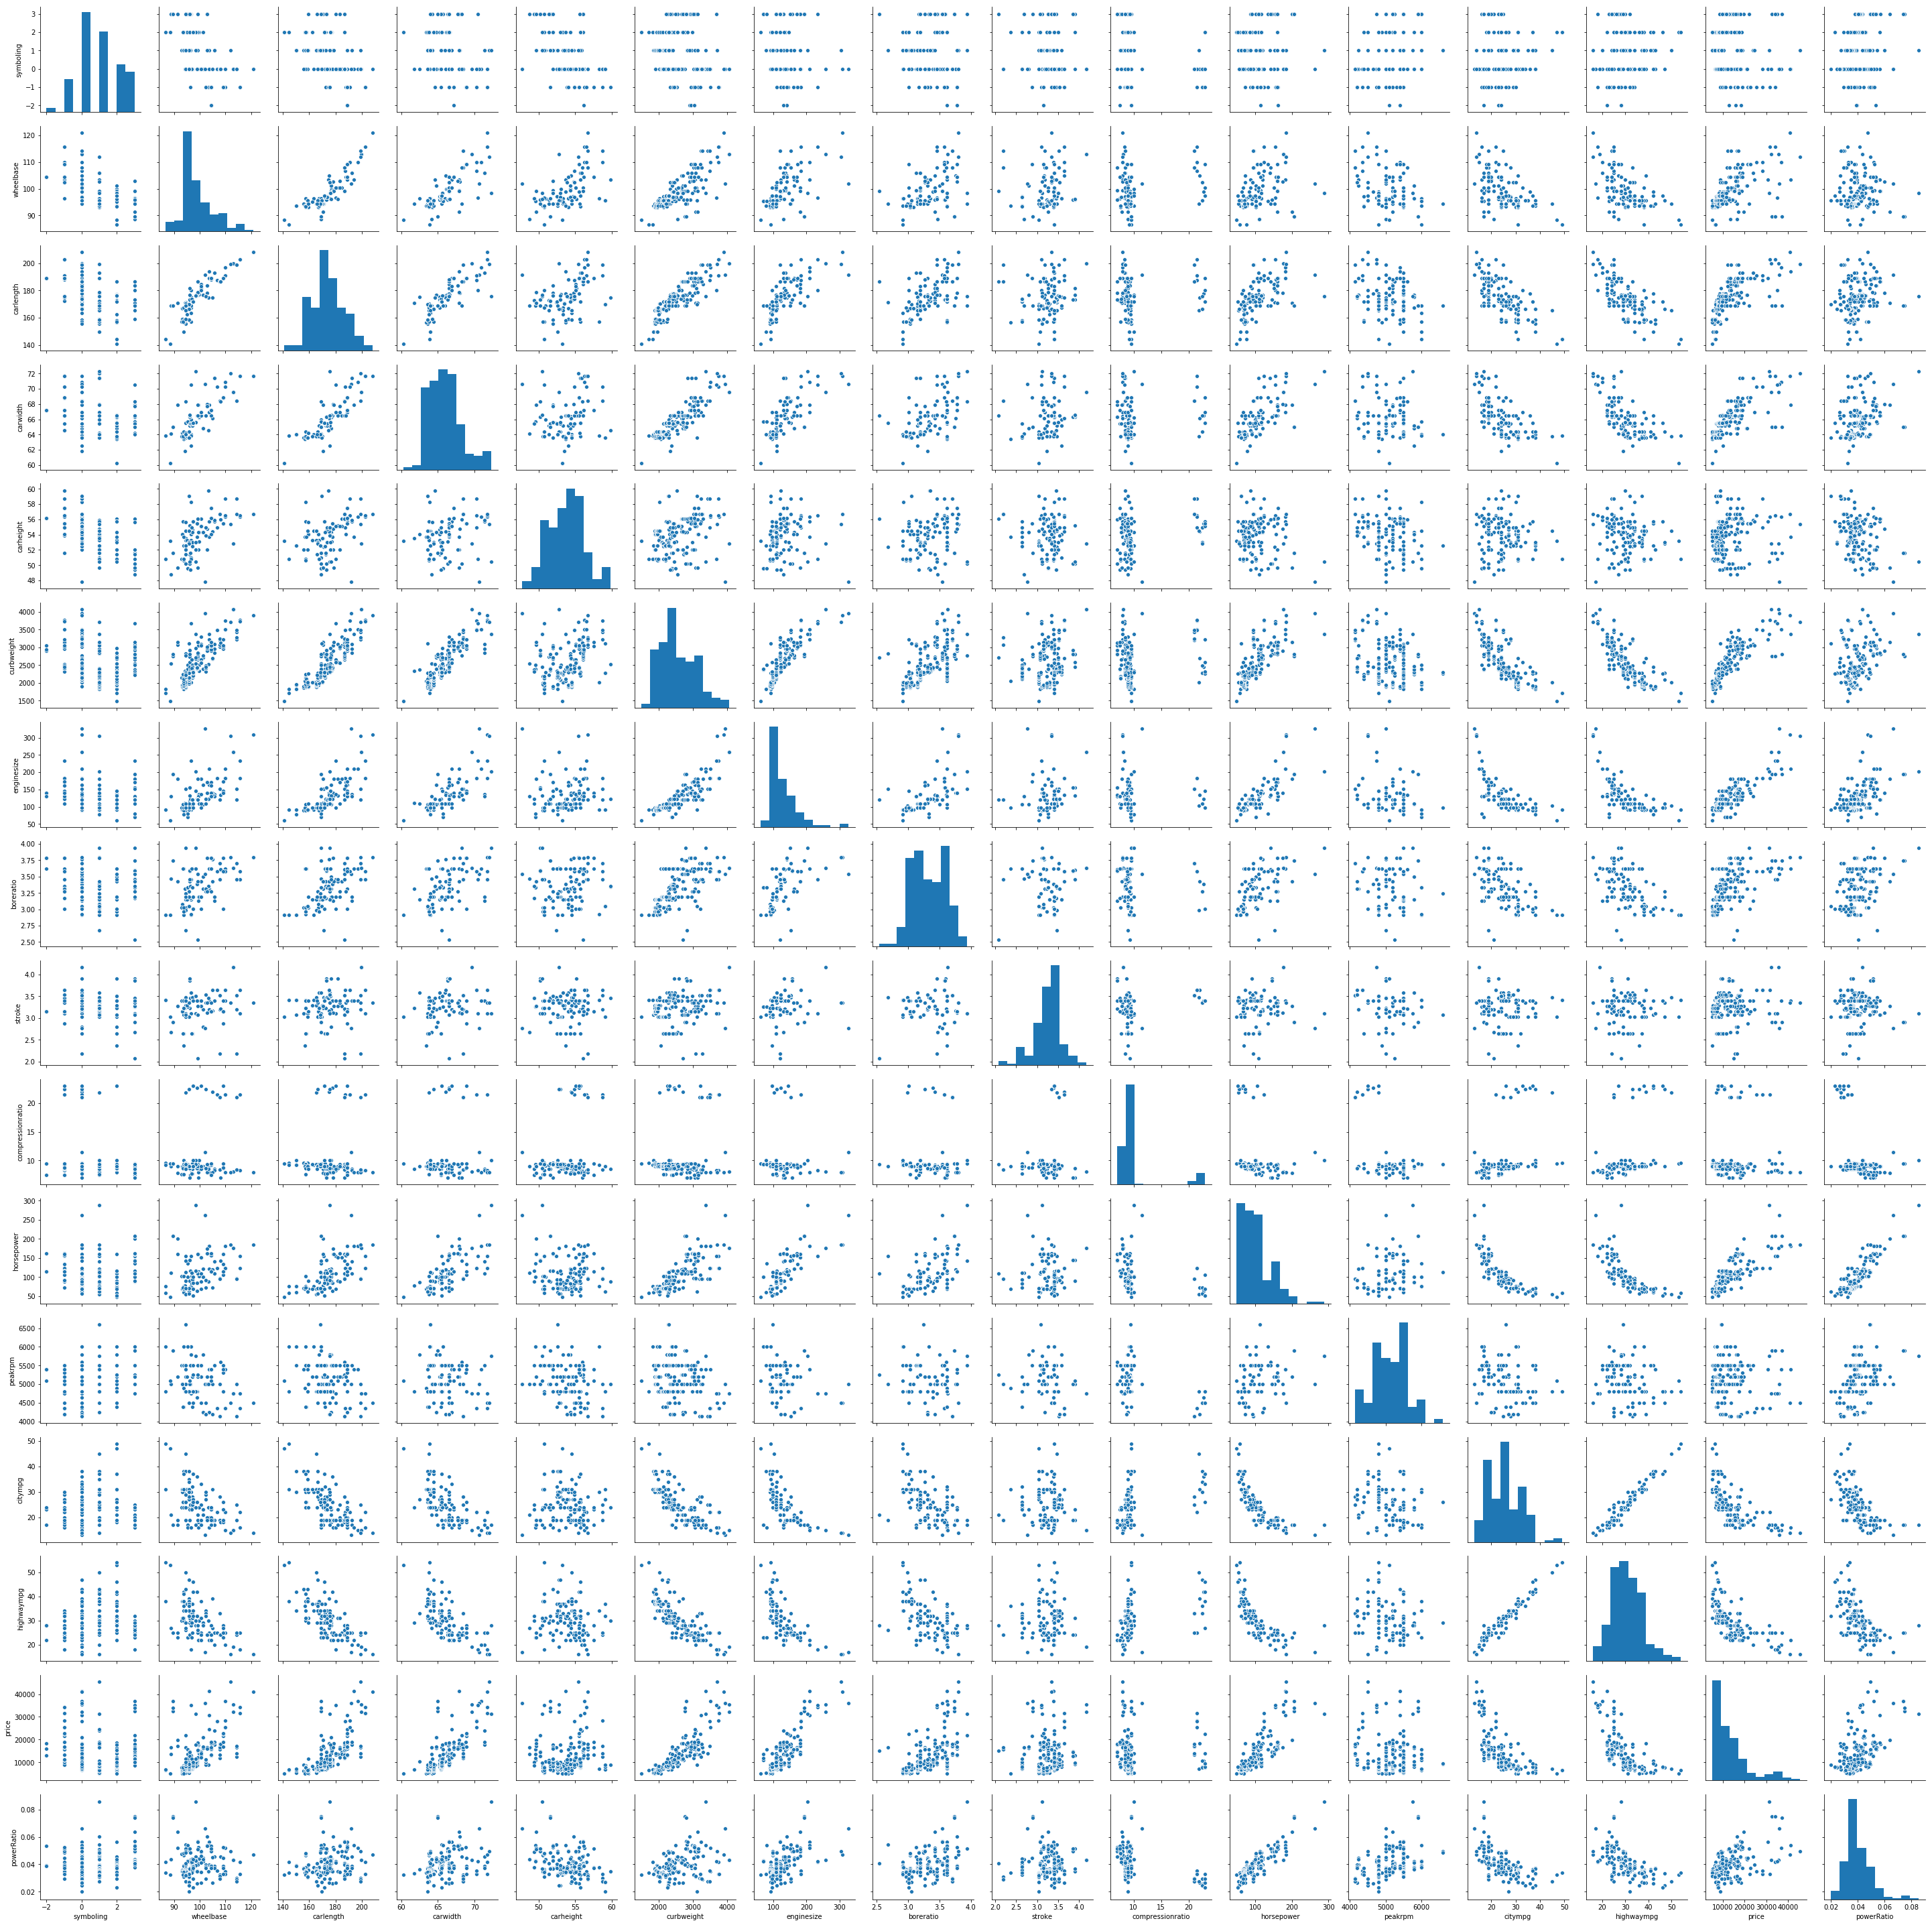

In [31]:
#Since there are lots of variable at this point. Pairplot execution takes a bit of time. Please bear with it!!!
sns.pairplot(car_data)

**Observation:**

From the above paiplot it seems like variables like wheelbase, carlength, carwidth, curbweight, enginesize, boreration, horsepower, citympg, highwaympg and powerRatio are the most reliable variables for linear modelling since these variables have somewhat linear pattern and will be best candidates for linear regression modelling.

# Step 3: Data Preparation

### Data Conversion:

There are few columns like cylindernumber and doornumber where the names represent the actual value of the variable. So we can convert the names to numbers and use them for analysis.

Below function will take care of this requirement.

In [32]:
#Now define a function to convert the number names to actual numbers for column cylindernumbers
def convertNameNum(value):
    if value.lower() == 'one':
        return 1
    elif value.lower() == 'two':
        return 2
    elif value.lower() == 'three':
        return 3
    elif value.lower() == 'four':
        return 4
    elif value.lower() == 'five':
        return 5
    elif value.lower() == 'six':
        return 6
    elif value.lower() == 'seven':
        return 7
    elif value.lower() == 'eight':
        return 8
    elif value.lower() == 'nine':
        return 9
    elif value.lower() == 'ten':
        return 10
    elif value.lower() == 'eleven':
        return 11
    elif value.lower() == 'twelve':
        return 12
  
#Convert cylindernumber
car_data['cylindernumber'] = car_data['cylindernumber'].apply(lambda x: convertNameNum(x))

#Add this to the numeric_data for later use.
numeric_data = pd.concat([numeric_data,car_data['cylindernumber']],axis=1)

### Check for Outliers

Now lets check and remove the outlier from the numeric data identified from above. For this lets define a function that will take into account the z-scores and remove the outlier values by keeping only those values that lie between +3 and -3.

In [33]:
#This function drops the numerical outliers
#It takes 2 parameters dataframe and threshold. By default threshold is 3.

def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain 'True' or 'False' depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) <= z_thresh, reduce=False) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)
 

#Check the shape
car_data.shape

#Check numerical columns
numeric_data = car_data.select_dtypes(include=[np.number])
numeric_data.columns

#Drop outliers
drop_numerical_outliers(car_data)

#Check shape
car_data.shape

(205, 27)

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'powerRatio'],
      dtype='object')

(176, 27)

## Conversion of Categorical Variables

In [34]:
#First lets check the categorical data
categorical_data = car_data.select_dtypes(exclude=[np.number])

categorical_data.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem', 'CarCompany',
       'carBudget'],
      dtype='object')

### Categorical Variables: Binary Variables Conversion

In [35]:
#Now from above steps I have already filtered out the categorical variables with 2 unique values in col2 variable
col2

['fueltype', 'aspiration', 'doornumber', 'enginelocation']

In [36]:
#We will fo binary conversion for these categirical variables
#gas:1 diesel:0
car_data['fueltype'] = car_data['fueltype'].map({'gas': 1, 'diesel': 0})

#std:1 turbo:0
car_data['aspiration'] = car_data['aspiration'].map({'std': 1, 'turbo': 0})

#two:1 four:0
car_data['doornumber'] = car_data['doornumber'].map({'two': 1, 'four': 0})

#front:1 rear:0
car_data['enginelocation'] = car_data['enginelocation'].map({'front': 1, 'rear': 0})

In [37]:
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,carBudget,powerRatio
0,3,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,13495,alfa-romero,Medium,0.043564
1,3,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,16500,alfa-romero,Medium,0.043564
2,1,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,...,3.47,9.0,154,5000,19,26,16500,alfa-romero,Medium,0.054552
3,2,1,1,0,sedan,fwd,1,99.8,176.6,66.2,...,3.40,10.0,102,5500,24,30,13950,audi,Medium,0.043646
4,2,1,1,0,sedan,4wd,1,99.4,176.6,66.4,...,3.40,8.0,115,5500,18,22,17450,audi,Medium,0.040722


### Categorical Variables : Dummy Variables Conversion 

In [38]:
#Check what are the remaining categorical variables for conversion
categorical_data = car_data.select_dtypes(exclude=[np.number])
categorical_data.columns

Index(['carbody', 'drivewheel', 'enginetype', 'fuelsystem', 'CarCompany',
       'carBudget'],
      dtype='object')

Now all these remaining variables have more than 1 levels so lets use dummy variables for these categorical variables.

In [39]:
#Now convert the rest of the categorical variables into dummy variables
#Define a function to this

#The function convertDummy take i/p as column name 
#Then it converts the variables into dummy variables
#and drop the original col after conversion
def convertDummy(col):
    global car_data
    print('Converting : ' + col)
    col_conv = pd.get_dummies(car_data[col], prefix=col, drop_first=True)
    car_data = pd.concat([car_data,col_conv],axis=1)
    car_data = car_data.drop([col],axis=1)
    #print(df.columns)
    #return df

In [40]:
#Convert the categorical values to dummy variables
for i in categorical_data.columns:
    convertDummy(i)

Converting : carbody
Converting : drivewheel
Converting : enginetype
Converting : fuelsystem
Converting : CarCompany
Converting : carBudget


In [41]:
car_data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'powerRatio', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CarCompany_audi',
       'CarCompany_bmw', 'CarCompany_buick', 'CarCompany_chevrolet',
       'CarCompany_dodge', 'CarCompany_honda', 'CarCompany_isuzu',
       'CarCompany_mazda', 'CarCompany_mercury', 'CarCompany_mitsubishi',
       'CarCompany_nissan', 'CarCompany_peugeot', 'CarCompany_plymouth',
       'Car

In [42]:
#Check if we have any more categorical variables left for conversion
#Check what are the remaining categorical variables for conversion
categorical_data = car_data.select_dtypes(exclude=[np.number])
categorical_data.columns

Index([], dtype='object')

Seems all data is converted. Lets check the final Data.

In [43]:
car_data.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo,carBudget_Medium,carBudget_Highend
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,1,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,1,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,1,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,1,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,1,0


# Step 4: Data Modelling

For modelling we would use a **Balance Approach** whereby we will select the subset of variables using **Automatic Approach using RFE** and then we will select and tune the model with variables by **Manual Approach** whereby we will eliminate or add the variables based on the statistical performance and business need.

In [44]:
#Import libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [45]:
#Split the dataset into train and test data
#We will split the avialable dataset into train:test with 70:30 ratio

df_train, df_test = train_test_split(car_data, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features


From the dataset we have, we can see that all the columns have varying integer values range. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. Scaling doesn't impact the model. 

We will use MinMax scaling approach here for scaling the features.

In [46]:
#Import the necessary libaries and create the scaler object
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

We will only scale the numeric_data and leave the other converted categorical data untouched as it is already is range 0 and 1.

In [47]:
#Check the numeric data
numeric_data.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'powerRatio'],
      dtype='object')

In [48]:
#Select the necessary columns
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'powerRatio']

In [49]:
#Now scale the data. We will only scale the train_data for now
#As we will be using fit_transform

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\mmajgaon.ORADEV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [50]:
#Check the data
df_train.head(5)
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo,carBudget_Medium,carBudget_Highend
101,0.4,1,1,0,1,0.437037,0.602662,0.434783,0.572727,0.643987,...,0,0,0,0,0,0,0,0,1,0
155,0.4,1,1,0,1,0.262963,0.374525,0.119565,0.936364,0.651899,...,0,0,0,0,0,1,0,0,0,0
196,0.0,1,1,0,1,0.581481,0.737643,0.510870,0.672727,0.559599,...,0,0,0,0,0,0,0,1,1,0
88,0.2,1,1,0,1,0.285185,0.425856,0.315217,0.254545,0.279008,...,0,0,0,0,0,0,0,0,0,0
51,0.6,1,1,1,1,0.166667,0.173004,0.184783,0.481818,0.013713,...,0,0,0,0,0,0,0,0,1,0


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarCompany_plymouth,CarCompany_porsche,CarCompany_renault,CarCompany_saab,CarCompany_subaru,CarCompany_toyota,CarCompany_volkswagen,CarCompany_volvo,carBudget_Medium,carBudget_Highend
count,123.000000,123.000000,123.000000,123.000000,123.0,123.000000,123.000000,123.000000,123.000000,123.000000,...,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,0.562602,0.934959,0.772358,0.422764,1.0,0.355525,0.432115,0.345705,0.435772,0.324783,...,0.056911,0.008130,0.008130,0.032520,0.081301,0.138211,0.032520,0.056911,0.422764,0.024390
std,0.248734,0.247606,0.421025,0.496019,0.0,0.188778,0.212884,0.204119,0.227611,0.243676,...,0.232619,0.090167,0.090167,0.178103,0.274414,0.346533,0.178103,0.232619,0.496019,0.154888
min,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,1.000000,0.000000,1.0,0.218519,0.303232,0.163043,0.245455,0.130274,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,1.000000,0.000000,1.0,0.292593,0.425856,0.315217,0.481818,0.274789,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,1.000000,1.000000,1.000000,1.0,0.414815,0.528517,0.434783,0.609091,0.500791,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the values are now normalized between 0 and 1. Now we will split the data into X (independent variables) and y (dependent variable). Here price is y variable

In [51]:
#Split data into X and y
y_train = df_train.pop('price')

X_train = df_train

As said earlier we will use **Balanced Approach** for model building whereby we will shortlist first a set of variables using RFE and then manually eliminate or add the variables as per requirement. Since there are 50 variables lets start by considering atleast top 15 variables for our analysis.

In [52]:
#Import essential libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [53]:
# Running RFE with the output number of the variable equal to 15
linear_model = LinearRegression()

#Fit the data with the model
linear_model.fit(X_train, y_train)

rfe = RFE(linear_model, 15)             # running RFE

rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

[('symboling', False, 39),
 ('fueltype', False, 29),
 ('aspiration', False, 34),
 ('doornumber', False, 40),
 ('enginelocation', False, 44),
 ('wheelbase', True, 1),
 ('carlength', False, 5),
 ('carwidth', True, 1),
 ('carheight', False, 16),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 3),
 ('stroke', False, 6),
 ('compressionratio', False, 31),
 ('horsepower', True, 1),
 ('peakrpm', False, 18),
 ('citympg', False, 27),
 ('highwaympg', False, 28),
 ('powerRatio', True, 1),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 41),
 ('drivewheel_rwd', False, 26),
 ('enginetype_l', False, 20),
 ('enginetype_ohc', False, 32),
 ('enginetype_ohcf', False, 4),
 ('enginetype_ohcv', False, 45),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 33),
 ('fuelsystem_4bbl', False, 2),
 ('fuelsystem_idi', False, 30),
 ('fuelsystem_mfi', 

In [54]:
#Filter the values with True values
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize',
       'horsepower', 'powerRatio', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_rotor',
       'CarCompany_buick', 'CarCompany_porsche', 'carBudget_Highend'],
      dtype='object')

Now we will build model using statsmodel for the detailed statistics and based on the descriptive statistics we will take the call.

In [55]:
#Consider the variables shortlisted by RFE for model building
X_train_rfe = X_train[col]

In [56]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [57]:
#Run the Model
linear_model1 = sm.OLS(y_train,X_train_rfe).fit()

In [58]:
#Check the summary
print(linear_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     114.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.15e-58
Time:                        09:42:10   Log-Likelihood:                 192.34
No. Observations:                 123   AIC:                            -352.7
Df Residuals:                     107   BIC:                            -307.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1898      0

In [59]:
#Import libraries for calculating VIF
#Define functions to reiterate models and calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Function to build the model
#This function takes X,y and col variables
#This function will drop the col passed and then build the new model and return new X_train
def buildModel(X,y,col):
    X_train_new = X.drop([col], axis = 1)
    X_train_lm = sm.add_constant(X_train_new)
    linear_model1 = sm.OLS(y,X_train_lm).fit()
    #Let's see the summary of our linear model
    print(linear_model1.summary())
    return X_train_new

#This function will calculate VIF
#This function take X as i/p
def VIF(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [60]:
#const is not required for analysis and it will just mess up our VIF calculation so drop it
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)
VIF(X_train_rfe)

              Features     VIF
6           powerRatio  107.25
5           horsepower   78.84
2           curbweight   57.70
4           enginesize   42.02
3       cylindernumber   35.39
9        carbody_sedan   28.96
0            wheelbase   28.24
1             carwidth   26.11
8    carbody_hatchback   22.02
10       carbody_wagon    7.21
7      carbody_hardtop    2.39
11    enginetype_rotor    2.22
12    CarCompany_buick    1.75
14   carBudget_Highend    1.27
13  CarCompany_porsche    1.22


We will consider VIF upto 5 as accptable and p-value upto 0.005 as acceptable. Considering these values curbweight has highest p-value 0.254 and also the VIF of 57.70 which is well above the acceptable limits so remove it.

In [61]:
#Build model and check VIF
X_train_new = buildModel(X_train_rfe, y_train, 'curbweight')
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     122.4
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.95e-59
Time:                        09:42:10   Log-Likelihood:                 191.59
No. Observations:                 123   AIC:                            -353.2
Df Residuals:                     108   BIC:                            -311.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2812      0

Now enginerotor has p value of 0.084 but acceptable VIF of 2.02. So we will leave it for now. The next highest p-value is of cylindernumber i.e. 0.013 and VIF of 35.38. This is not within acceptable limits so lets drop it.

In [62]:
#Build model and check VIF
X_train_new = buildModel(X_train_new, y_train, 'cylindernumber')
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     125.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.70e-59
Time:                        09:42:11   Log-Likelihood:                 188.06
No. Observations:                 123   AIC:                            -348.1
Df Residuals:                     109   BIC:                            -308.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3192      0

Now  engine_rotor has p-value of 0.516 but low VIF of 1.68. While wheelbase has high p-value of 0.031 and VIF of 24.87. So lets drop it as its outside our permissible limits.

In [63]:
X_train_new = buildModel(X_train_new, y_train, 'wheelbase')
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     130.7
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.21e-59
Time:                        09:42:11   Log-Likelihood:                 185.43
No. Observations:                 123   AIC:                            -344.9
Df Residuals:                     110   BIC:                            -308.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3375      0

Now again enginerotor has p value 0f 0.507 and low VIF of 1.67. The its carbody_hardtop with p value 0.015 but VIF of 2.05. After it is the carbody_sedan has p value of 0.007 and VIF of 18.06 which is high as per our set limits so drop it.

In [64]:
X_train_new = buildModel(X_train_new, y_train, 'carbody_sedan')
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     133.9
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.03e-58
Time:                        09:42:11   Log-Likelihood:                 181.33
No. Observations:                 123   AIC:                            -338.7
Df Residuals:                     111   BIC:                            -304.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2296      0

In this iteration carbody_hardtop is highest with p value 0.540 and VIF 1.16. engine_rotor is next with 0.413 and VIF 1.65. Then is carbody_wagon with p value 0.038 and VIF 1.17 then its carbody_hatchback with p value 0.010 and VIF 2.10. Then its enginesize with p-value 0.009 and VIF 18.65. Since these both are high drop it.

In [65]:
X_train_new = buildModel(X_train_new, y_train, 'enginesize')
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     139.2
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.46e-58
Time:                        09:42:11   Log-Likelihood:                 177.57
No. Observations:                 123   AIC:                            -333.1
Df Residuals:                     112   BIC:                            -302.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1538      0

Now carbody_hardtop has highest p value of 0.331 with VIF 1.13 and the carbody_wagon with p value of 0.143 and VIF 1.15. Since both the VIF are in acceptable limit we will drop the variable with highest p-value i.e carbody_hardtop

In [66]:
X_train_new = buildModel(X_train_new, y_train, 'carbody_hardtop')
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     154.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.08e-59
Time:                        09:42:11   Log-Likelihood:                 177.05
No. Observations:                 123   AIC:                            -334.1
Df Residuals:                     113   BIC:                            -306.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1517      0

Now we have carbody_wagon with highest p-value of 0.167 with VIF 1.15 and carbody_hatchback with VIF 1.99. Since both VIF are under acceptable limit we will drop variable with high p-value carbody_wagon.

In [67]:
X_train_new = buildModel(X_train_new, y_train, 'carbody_wagon')
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           5.89e-60
Time:                        09:42:11   Log-Likelihood:                 176.01
No. Observations:                 123   AIC:                            -334.0
Df Residuals:                     114   BIC:                            -308.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1252      0

Now we have carbody_hatchback with highest p-value 0.011 and VIF 1.95 followed by engine_rotor with p-value 0.006 and VIF 1.10. So we drop carbody_hatchback which has highest p-value

In [68]:
X_train_new = buildModel(X_train_new, y_train, 'carbody_hatchback')
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     186.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.01e-59
Time:                        09:42:11   Log-Likelihood:                 172.55
No. Observations:                 123   AIC:                            -329.1
Df Residuals:                     115   BIC:                            -306.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1198      0

Now we have enginetype_rotor with p-value of 0.026 rest all are in limits so drop it.

In [69]:
X_train_new = buildModel(X_train_new, y_train, 'enginetype_rotor')
VIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     209.7
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           8.11e-60
Time:                        09:42:11   Log-Likelihood:                 169.87
No. Observations:                 123   AIC:                            -325.7
Df Residuals:                     116   BIC:                            -306.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1080      0

Now all the variables are within the significance level of 0.005. R-squared it 0.916 and Adj. Rsqaured is 0.911 which seems pretty good. 

But horsepower and powerRatio have high VIF of > 7.  We will hold are analysis for the horsepower and powerRatio withi high VIF and will get back to them later. 

**I have explained in detail in later stages why I hold on to this variables for now.**

In [70]:
#X_train_new = buildModel(X_train_new, y_train, 'horsepower')
#VIF(X_train_new)

In [71]:
linear_model1 = sm.OLS(y_train,X_train_new).fit()

In [72]:
X_train_new.columns

Index(['carwidth', 'horsepower', 'powerRatio', 'CarCompany_buick',
       'CarCompany_porsche', 'carBudget_Highend'],
      dtype='object')

In [73]:
y_train_price1 = linear_model1.predict(X_train_new)

Text(0.5, 1.0, 'Error distribution for model-1')

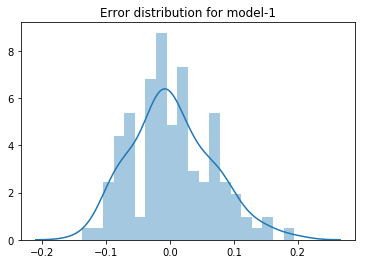

In [74]:
fig = plt.figure()
sns.distplot((y_train - y_train_price1), bins = 20).set_title('Error distribution for model-1')

The error terms are normally distributed with mean very close to the zero. This is one of the fundamental assumptions of the linear model. And hence we can say that the model we have designed is pretty good. Lets try the predictions on this model first

In [75]:
#Check the numeric variables for scaling the test dataset.
num_vars

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'powerRatio']

In [76]:
#Scale the test dataset
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [77]:
#Extract the X and y variables
#Here y variable is price
y_test = df_test.pop('price')
X_test = df_test

In [78]:
# Creating X_test_new dataframe by dropping variables from X_test
#X_train_new = X_train_new.drop('const',axis=1)
X_train_new.columns
X_test_new = X_test[X_train_new.columns]
X_test_new.columns

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new = X_test_new.drop('const',axis=1)

Index(['carwidth', 'horsepower', 'powerRatio', 'CarCompany_buick',
       'CarCompany_porsche', 'carBudget_Highend'],
      dtype='object')

Index(['carwidth', 'horsepower', 'powerRatio', 'CarCompany_buick',
       'CarCompany_porsche', 'carBudget_Highend'],
      dtype='object')

In [79]:
# Making predictions
y_pred1 = linear_model1.predict(X_test_new)

Text(0.5, 1.0, 'Scatter plot for train v/s test data fit [x=Train, o=test]')

Text(0.5, 0, 'test')

Text(0, 0.5, 'predicted')

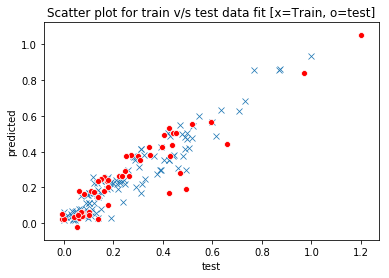

In [80]:
#Train v/s test data fit plot
fig = plt.figure()
sns.scatterplot(y_train,y_train_price1,marker='x')
sns.scatterplot(y_test,y_pred1,color='red',marker='o').set_title('Scatter plot for train v/s test data fit [x=Train, o=test]')              # Plot heading 
plt.xlabel('test')                          # X-label
plt.ylabel('predicted')                          # Y-label

The scatter plot above shows that the model is predicting the values pretty well. Lets check the error spread on test data.

Text(0.5, 1.0, 'Error distribution on test data')

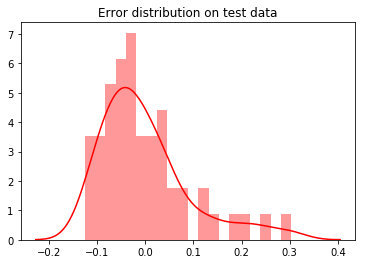

In [81]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred1), bins = 20,color='red').set_title('Error distribution on test data')   

The error terms are still very well normally distributed with mean tilting a bit towards negative side but its still pretty close to 0. Now lets check the r2_score for this model

In [82]:
from sklearn.metrics import r2_score
print('r2_score for model1 is: ' + str(r2_score(y_test, y_pred1)))

r2_score for model1 is: 0.8415352386118207


Text(0.5, 1.0, 'Test v/s predicted data fit plot')

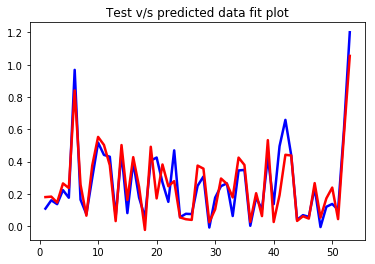

In [83]:
#Check the actual distribution of test and predicted data
c = [i for i in range(1,54,1)] 
s = pd.Series(c)
plt.title('Test v/s predicted data fit plot')
plt.plot(s,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(s,y_pred1, color="red", linewidth=2.5, linestyle="-")

The predictions and the test data almost overlap each other indicating its a good fit. And with r2_score of 0.86 this model seems pretty good.

But we had earlier let out some abnormalities. So lets address them.

Now lets drop horsepower with high VIF

In [84]:
#Create a new train set X_train_new1 and do the calculations on it so that we can compare the models later
X_train_new1 = X_train_new
X_train_new1 = buildModel(X_train_new1, y_train, 'horsepower')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     153.1
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.29e-49
Time:                        09:42:17   Log-Likelihood:                 142.12
No. Observations:                 123   AIC:                            -272.2
Df Residuals:                     117   BIC:                            -255.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1287      0

In [85]:
VIF(X_train_new1)

             Features   VIF
0            carwidth  5.59
1          powerRatio  4.78
2    CarCompany_buick  1.52
4   carBudget_Highend  1.03
3  CarCompany_porsche  1.02


The R square and adjusted R square have now dropped to 0.867 and 0.862 from 0.916 and 0.911 respectively. 
We could see a drop in the values but still the values are good.

Lets train the model using this features and check the error distribution is for this model

In [86]:
#Build model 2
linear_model2 = sm.OLS(y_train,X_train_new1).fit()

In [87]:
#Train with model 2
y_train_price2 = linear_model2.predict(X_train_new1)

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Error distribution for model-1')

Text(0.5, 1.0, 'Error distribution for model-2')

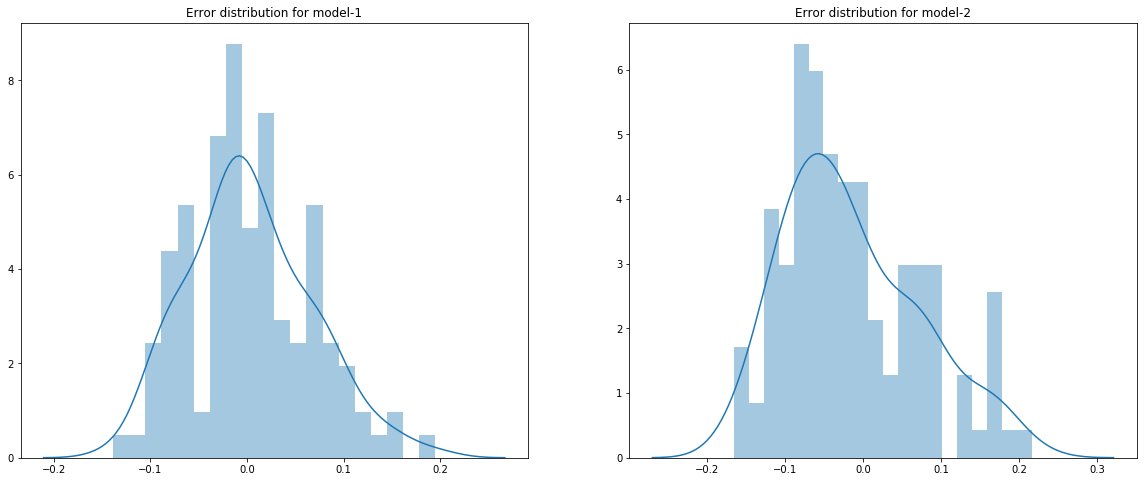

In [88]:
plt.figure(figsize=(20,8))
#Model 1
plt.subplot(1,2,1)
sns.distplot((y_train - y_train_price1), bins = 20).set_title('Error distribution for model-1')
#Model 2
plt.subplot(1,2,2)
sns.distplot((y_train - y_train_price2), bins = 20).set_title('Error distribution for model-2')

From above plot its clear that model-1 is good fit since the error terms are more normally distributed around the mean zero while for model 2 it seems like its tilted a bit towards negative side or less than 0. Now lets predict the data based on model-2 and check.

In [89]:
#Prepare the test data
X_train_new1.columns
X_test_new1 = X_test[X_train_new1.columns]
X_test_new1.columns

Index(['carwidth', 'powerRatio', 'CarCompany_buick', 'CarCompany_porsche',
       'carBudget_Highend'],
      dtype='object')

Index(['carwidth', 'powerRatio', 'CarCompany_buick', 'CarCompany_porsche',
       'carBudget_Highend'],
      dtype='object')

In [90]:
# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new1)
X_test_new1 = X_test_new1.drop('const',axis=1)

In [91]:
# Making predictions
y_pred2 = linear_model2.predict(X_test_new1)

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Scatter plot for train v/s test data fit [x=Train, o=test] Model1')

Text(0.5, 0, 'test')

Text(0, 0.5, 'predicted')

Text(0.5, 1.0, 'Scatter plot for train v/s test data fit [x=Train, o=test] Model2')

Text(0.5, 0, 'test')

Text(0, 0.5, 'predicted')

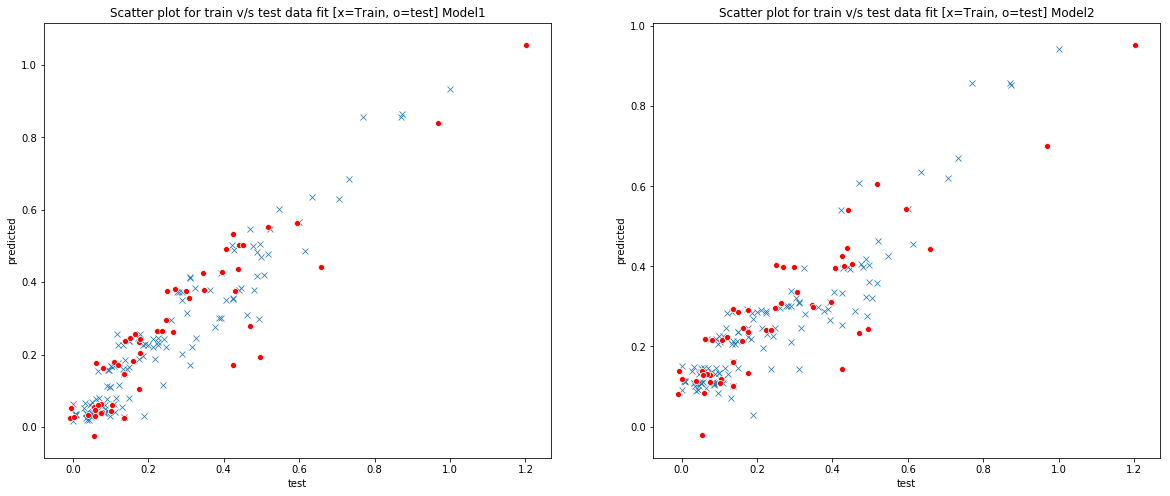

In [92]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
#Model 1
sns.scatterplot(y_train,y_train_price1,marker='x')
sns.scatterplot(y_test,y_pred1,color='red',marker='o').set_title('Scatter plot for train v/s test data fit [x=Train, o=test] Model1') 
plt.xlabel('test')             
plt.ylabel('predicted') 
plt.subplot(1,2,2)
#Model 2
sns.scatterplot(y_train,y_train_price2,marker='x')
sns.scatterplot(y_test,y_pred2,color='red',marker='o').set_title('Scatter plot for train v/s test data fit [x=Train, o=test] Model2')         
plt.xlabel('test')                          
plt.ylabel('predicted')   

Even though there doesn't seem much of the difference between the 2 plots, but model 1 distribution seems more closely fitted and linear then model 2. Now lets check the r2_score.

In [93]:
from sklearn.metrics import r2_score
print('r2_score for model 1 was: ' +str(r2_score(y_test, y_pred1)))
print('r2_score for model 2 is: ' +str(r2_score(y_test, y_pred2)))

r2_score for model 1 was: 0.8415352386118207
r2_score for model 2 is: 0.7643784043073555


There seems to be huge difference in the r2_score. Model 1 had r2 score of 0.84 while model 2 has r2_score of 0.76. r2_score for model 1 > r2 score of model 2. So overall fit for model 1 is better.

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Test v/s Prediction fit for model-1')

Text(0.5, 1.0, 'Test v/s Prediction fit for model-2')

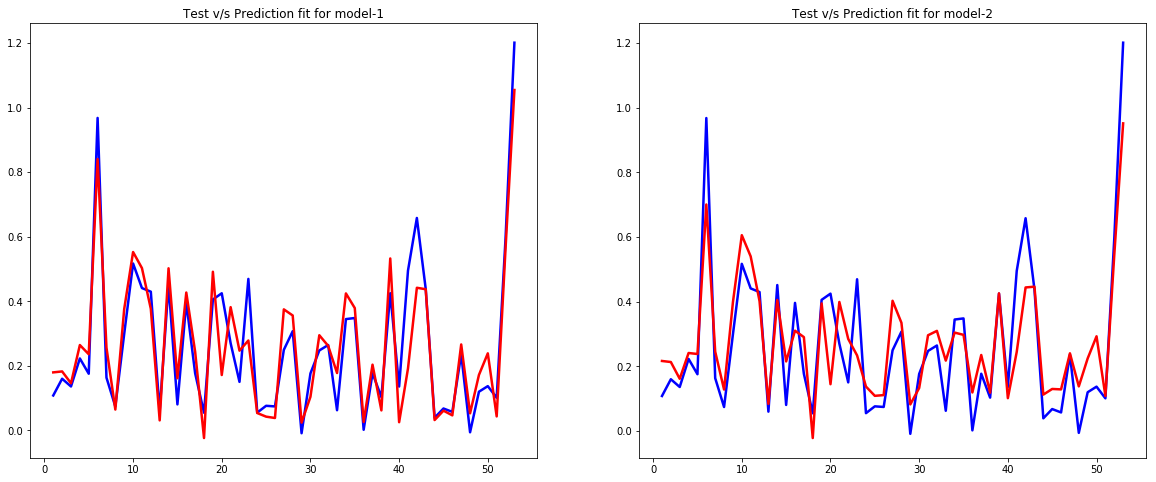

In [94]:
c = [i for i in range(1,54,1)] 
s = pd.Series(c)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
#Model 1
plt.title('Test v/s Prediction fit for model-1')
plt.plot(s,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(s,y_pred1, color="red", linewidth=2.5, linestyle="-")
plt.subplot(1,2,2)
#Model 2
c = [i for i in range(1,54,1)] 
s = pd.Series(c)
plt.title('Test v/s Prediction fit for model-2')
plt.plot(s,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(s,y_pred2, color="red", linewidth=2.5, linestyle="-")

Overall model 1 seems closely fitted then model 2. 

Now lets drop the CarCompany_porsche variable furthur which has which has higher p value of 0.073

In [95]:
#Extract the new train data
X_train_new2 = X_train_new1
X_train_new2 = buildModel(X_train_new2, y_train, 'CarCompany_porsche')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     187.0
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.43e-50
Time:                        09:42:21   Log-Likelihood:                 140.42
No. Observations:                 123   AIC:                            -270.8
Df Residuals:                     118   BIC:                            -256.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1337      0.02

In [96]:
#Check VIF
VIF(X_train_new2)

            Features   VIF
0           carwidth  5.56
1         powerRatio  4.78
2   CarCompany_buick  1.52
3  carBudget_Highend  1.03


In [97]:
#Build the model 3
linear_model3 = sm.OLS(y_train,X_train_new2).fit()

y_train_price3 = linear_model3.predict(X_train_new2)

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Error distribution for model-1')

Text(0.5, 1.0, 'Error distribution for model-2')

Text(0.5, 1.0, 'Error distribution for model-3')

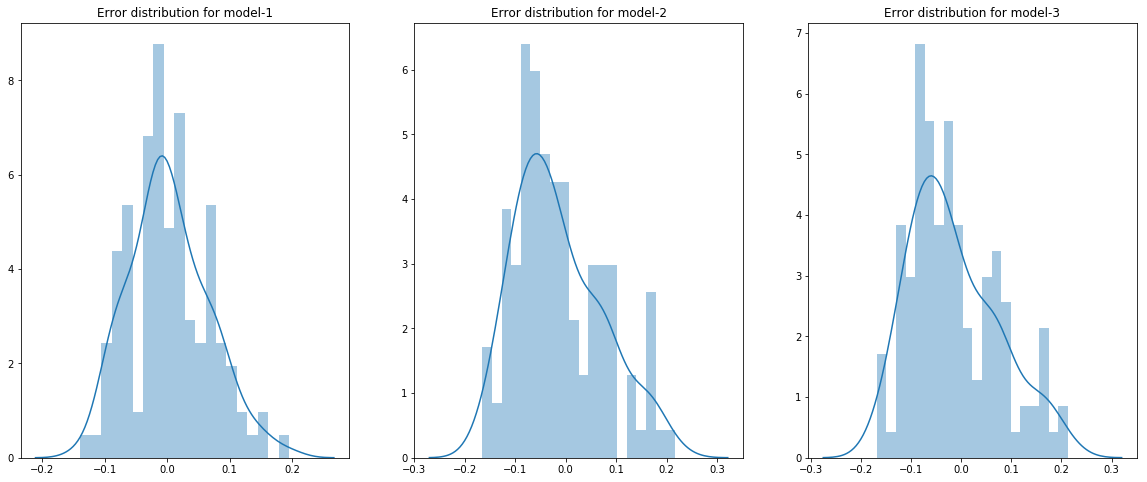

In [98]:
#Check error distribution for train 
plt.figure(figsize=(20,8))
#Model 1
plt.subplot(1,3,1)
sns.distplot((y_train - y_train_price1), bins = 20).set_title('Error distribution for model-1')
#Model 2
plt.subplot(1,3,2)
sns.distplot((y_train - y_train_price2), bins = 20).set_title('Error distribution for model-2')
#Model 3
plt.subplot(1,3,3)
sns.distplot((y_train - y_train_price3), bins = 20).set_title('Error distribution for model-3')

Error distribution for model 2 and model 3 seems somewhat same but model 3 is a bit borader towards the base and more titled towards the negative values or less than 0. As compared in between the 3 model model 1 still seems uniformaly distributed around the mean 0 which is one of the important assumptions for Linear Regression. So model 1 is better than other 2.

In [99]:
#Now lets test and predict the model 3
X_train_new2.columns
X_test_new2 = X_test[X_train_new2.columns]
X_test_new2.columns

# Adding a constant variable 
X_test_new2 = sm.add_constant(X_test_new2)
X_test_new2 = X_test_new2.drop('const',axis=1)


Index(['carwidth', 'powerRatio', 'CarCompany_buick', 'carBudget_Highend'], dtype='object')

Index(['carwidth', 'powerRatio', 'CarCompany_buick', 'carBudget_Highend'], dtype='object')

In [100]:
# Making predictions
y_pred3 = linear_model3.predict(X_test_new2)

<Figure size 576x1440 with 0 Axes>

Text(0.5, 1.0, 'Scatter plot for train v/s test data fit [x=Train, o=test] Model 1')

Text(0.5, 0, 'test')

Text(0, 0.5, 'predicted')

Text(0.5, 1.0, 'Scatter plot for train v/s test data fit [x=Train, o=test] Model 1')

Text(0.5, 0, 'test')

Text(0, 0.5, 'predicted')

Text(0.5, 1.0, 'Scatter plot for train v/s test data fit [x=Train, o=test] Model 1')

Text(0.5, 0, 'test')

Text(0, 0.5, 'predicted')

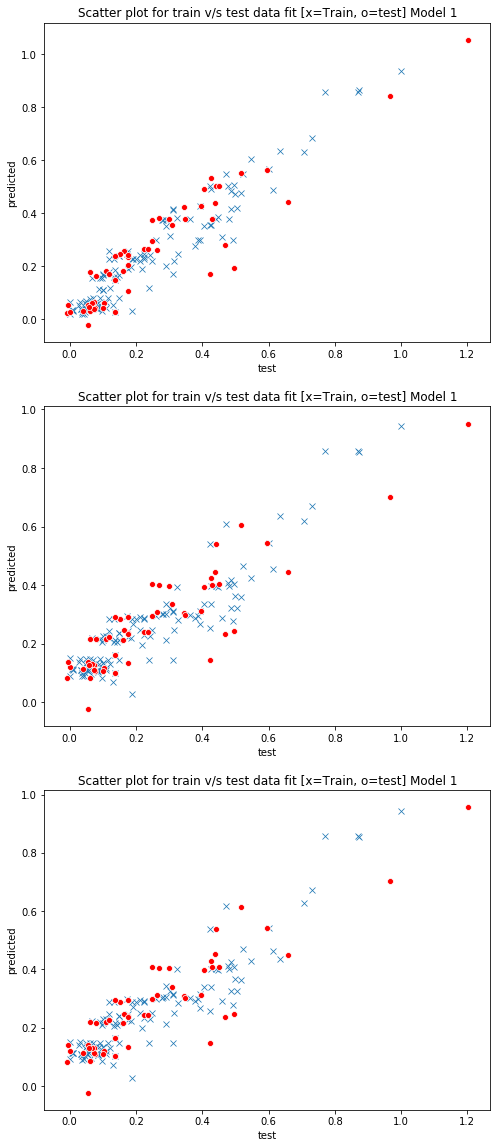

In [101]:
plt.figure(figsize=(8,20))
plt.subplot(3,1,1)
#Model 1
sns.scatterplot(y_train,y_train_price1,marker='x')
sns.scatterplot(y_test,y_pred1,color='red',marker='o').set_title('Scatter plot for train v/s test data fit [x=Train, o=test] Model 1')
plt.xlabel('test')             
plt.ylabel('predicted') 
plt.subplot(3,1,2)
#Model 2
sns.scatterplot(y_train,y_train_price2,marker='x')
sns.scatterplot(y_test,y_pred2,color='red',marker='o').set_title('Scatter plot for train v/s test data fit [x=Train, o=test] Model 1')           
plt.xlabel('test')                     
plt.ylabel('predicted')   
plt.subplot(3,1,3)
#Model 3
sns.scatterplot(y_train,y_train_price3,marker='x')
sns.scatterplot(y_test,y_pred3,color='red',marker='o').set_title('Scatter plot for train v/s test data fit [x=Train, o=test] Model 1')           
plt.xlabel('test')         
plt.ylabel('predicted')   

From the above plots it again seems that data for model 1 is more closely fitted as model 2 and model 3. Now lets check the r2_score.

In [102]:
from sklearn.metrics import r2_score
print('r2_score for model 1 was: ' +str(r2_score(y_test, y_pred1)))
print('r2_score for model 2 was: ' +str(r2_score(y_test, y_pred2)))
print('r2_score for model 3 is: ' +str(r2_score(y_test, y_pred3)))

r2_score for model 1 was: 0.8415352386118207
r2_score for model 2 was: 0.7643784043073555
r2_score for model 3 is: 0.7628160848953578


There isnt mcuh difference between the r2_score of model 2 and model 3. Its almost 0.76. So we could say that we can either choose model 2 and model 3. Yet model 1 still has high score for r2 of 0.84.

<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Test v/s Prediction fit for model-1')

Text(0.5, 1.0, 'Test v/s Prediction fit for model-2')

Text(0.5, 1.0, 'Test v/s Prediction fit for model-3')

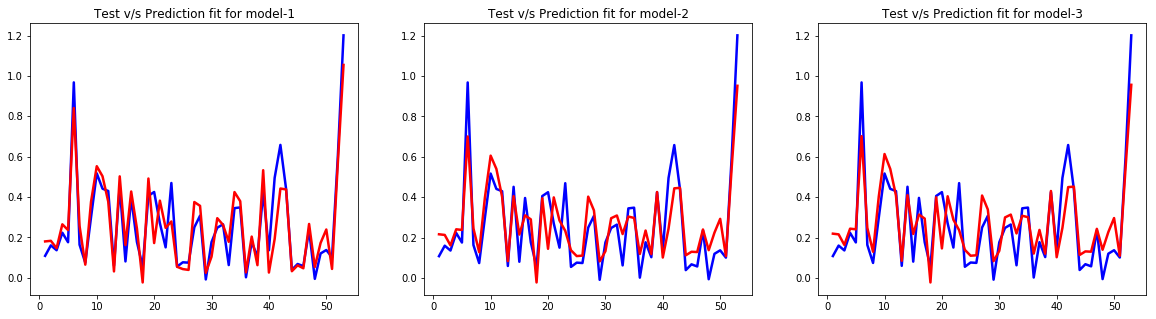

In [103]:
#Check the actual fit of test and predicted data for Model 3
c = [i for i in range(1,54,1)] 
s = pd.Series(c)
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
#Model 1
plt.title('Test v/s Prediction fit for model-1')
plt.plot(s,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(s,y_pred1, color="red", linewidth=2.5, linestyle="-")
plt.subplot(1,3,2)
#Model 2
c = [i for i in range(1,54,1)] 
s = pd.Series(c)
plt.title('Test v/s Prediction fit for model-2')
plt.plot(s,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(s,y_pred2, color="red", linewidth=2.5, linestyle="-")
plt.subplot(1,3,3)
#Model 3
c = [i for i in range(1,54,1)] 
s = pd.Series(c)
plt.title('Test v/s Prediction fit for model-3')
plt.plot(s,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(s,y_pred3, color="red", linewidth=2.5, linestyle="-")

As seen from the above plot Model 1 still fits better than Model 2 and Model 3

To refine the model furthur lets try dropping cardwidth which has slight higher VIF of 5.56 (since for our modelling we have kept limit of VIF to 5).

In [104]:
#Drop the variable cardwidth and build a model
X_train_new3 = X_train_new2
X_train_new3 = buildModel(X_train_new3, y_train, 'carwidth')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     55.45
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.69e-22
Time:                        09:42:24   Log-Likelihood:                 71.633
No. Observations:                 123   AIC:                            -135.3
Df Residuals:                     119   BIC:                            -124.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0394      0.03

In [105]:
VIF(X_train_new3)

            Features   VIF
0         powerRatio  1.04
2  carBudget_Highend  1.03
1   CarCompany_buick  1.01


Now though all the paramaters are within the permissible limit the R square and Adj. R square score has drastically reduced to 0.58.
So this model will furthur detroit and wont give good predictions so we will stop here.

# Conclusion

## Model 1
In **Model 1** we had R-squared value as 0.916 and Adjusted R-squared as 0.911. 

Also we had F-statistics of 209.7 and Probablity of F-stats as 8.11e-60. 

All these values seem pretty good for the model. The model is able to explain ~91% of data variance also the overall fit (F-stats score) is high as compared to other models. 

Even though the VIF for few variables like that of horsepower and powerRatio was high all the other model parameters were pretty good. 

Also the r2_score for this model was high with 0.84. Hence this model was a very much good fit for our requirement. 

The errors were best normally distributed for this model and the data fit for test and predicted data was more for this model.

The parameters horsepower and powerRatio are important while deciding the price as usually the cars with high horsepower and high powerRatio are usually priced high. The VIF factor can be high because powerRatio is derived from horsepower and hence there may be some sort of co-relation with them. 

But modelling the data with these variables gives pretty good results and hence we can consider this model for predictions.

## Model 2

In **Model 2** abnormalities in the Model 1 (parameters with slight high VIF) were taken care and model was rebuild. 

We had R-sqaured value of 0.867 and Adjusted R squared value of 0.862.

Also the F statistics was 153.1 and Probability of F-stats was 129e-49.

All these values are pretty good but less as compare to Model 1. this model was still able to explain ~86% of data variance in the dataset. The F-stat score is pretty good but low as compared to model 1. So overall the data fit for this model is bit on lower side as that of Model 1.

Also the r2_score for this model was 0.764 which is good but low as compared to model.

The errors were normally distributed for this model too but were slightly left skewed as compared to Model 1. The actual data fit for test and predicted data was also good but less as compared to Model 1.

## Model 3

Furthur the abnormalities from Model 2 were removed and Model 3 was designed. This model didnt vary much from Model 2.

The R-squared value was 0.864 and Adjusted R-sqaured was 0.859 which is pretty much same as that of Model 2.

The model is still able to explain 86% of data variance in the dataset as was for Model 2.

The F-stat score slightly improved for this model with 187.0 but was not as high as Model 1.
The probablity of F-stats was good for this model too with 4.43e-50.

The r2_score for this model was 0.762 which is pretty much similar to the Model 2.

But since F-stats is more for Model 3 then Model 2 we can infer that Model 3 is better fitting overall then Model 2.

In last model after dropping car_width the R-sqaure and Adjusted R-square drastically dropped to 0.5. So we stopped the feature elimination and converged our model.

Overall barring few abnormalities **Model 1 seems to be good fit over Model 2 and Model 3.**

**Business Conclusion:**

1) Based on the model developed it seems like technical variables like horsepower and powerRatio are driving variables when it comes to car pricing. 

And more over it seems legit since people usually seem to go more for fuel economy which can be achieved with high powerRatio and better muscle which can be achieved from high horsepower when they purchase the cars. And if they have to pay more to save more in future (on gas and maintenance) they wont mind paying higher price.

2) But the most important variable which is not even technical is **BRAND**. As seen from the modelling parameters the top 10 parameters are not even technical parameters but **BRAND NAMES** and higher the **BRAND VALUE** higher the price.

Hence even our model predicted the carBudget_highend is also most important variable while driving the car price. The carBudget_highend was derived for the cars with high price range and these consisted of brands like BMW, PORSCHE, JAGUAR, BUICK and so on. So we can infer that **BRAND NAME** is infact the most important variable driving the car price and if the company wants to price their cars in higher range they will have to spend substantial amount marketting their BRAND among the consumers.